In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation,Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import imagenet_utils

from sklearn.model_selection import train_test_split

import cv2

In [2]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'

test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [3]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        i = 0
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(labels_dict[folder])
         
    
    images = np.array(images)
    images = images.astype('float32')
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.15)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test
    return images, labels

In [4]:
X_train, X_test, Y_train, Y_test = load_data()


LOADING DATA FROM : N | I | U | P | Y | Z | H | C | B | del | D | T | M | K | Q | F | G | nothing | E | X | S | L | A | V | space | W | R | J | O | 
Loaded 73950 images for training, Train data shape = (73950, 64, 64, 3)
Loaded 13050 images for testing Test data shape = (13050, 64, 64, 3)


In [5]:
X_train = tf.keras.applications.mobilenet.preprocess_input(X_train)


In [6]:
mobilenet = tf.keras.applications.MobileNet(include_top=False, weights='imagenet')



17227776/17225924 [==============================] - 1s 0us/step


In [7]:
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 

In [8]:
model = Sequential()
model.add(InputLayer(input_shape=(64,64,3)))
for layer in mobilenet.layers:
    model.add(layer)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         multiple                  0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    multiple                  0         
_________________________________________________________________
conv1 (Conv2D)               multiple                  864       
_________________________________________________________________
conv1_bn (BatchNormalization multiple                  128       
_________________________________________________________________
conv1_relu (ReLU)            multiple                  0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  multiple                  288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza multiple                  1

In [10]:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(29, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         multiple                  0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    multiple                  0         
_________________________________________________________________
conv1 (Conv2D)               multiple                  864       
_________________________________________________________________
conv1_bn (BatchNormalization multiple                  128       
_________________________________________________________________
conv1_relu (ReLU)            multiple                  0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  multiple                  288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza multiple                  1

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [13]:
# model.fit( x=images, y=labels, batch_size=64, epochs=60, verbose=1)
curr_model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 10, validation_split = 0.15, verbose=1)


Epoch 1/10
983/983 [==============================] - 26s 26ms/step - loss: 0.3177 - accuracy: 0.9158 - val_loss: 0.0642 - val_accuracy: 0.9816
Epoch 2/10
983/983 [==============================] - 25s 25ms/step - loss: 0.0719 - accuracy: 0.9814 - val_loss: 0.2036 - val_accuracy: 0.9530
Epoch 3/10
983/983 [==============================] - 25s 25ms/step - loss: 0.0749 - accuracy: 0.9827 - val_loss: 0.0464 - val_accuracy: 0.9870
Epoch 4/10
983/983 [==============================] - 24s 25ms/step - loss: 0.0648 - accuracy: 0.9856 - val_loss: 0.0873 - val_accuracy: 0.9831
Epoch 5/10
983/983 [==============================] - 25s 25ms/step - loss: 0.0529 - accuracy: 0.9881 - val_loss: 0.0713 - val_accuracy: 0.9799
Epoch 6/10
983/983 [==============================] - 24s 25ms/step - loss: 0.0596 - accuracy: 0.9880 - val_loss: 0.0195 - val_accuracy: 0.9950
Epoch 7/10
983/983 [==============================] - 24s 25ms/step - loss: 0.0484 - accuracy: 0.9907 - val_loss: 0.0147 - val_accuracy:

In [14]:
import matplotlib.pyplot as plt

In [15]:
curr_model_hist


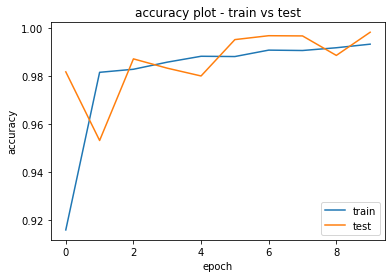

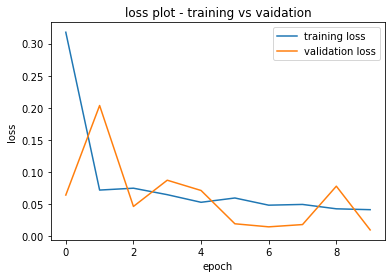

In [18]:
plt.plot(curr_model_hist.history['accuracy'])
plt.plot(curr_model_hist.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [19]:
X_test = tf.keras.applications.mobilenet.preprocess_input(X_test)


In [20]:
score = model.evaluate(x = X_test, y = Y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

Accuracy for test images: 99.831 %


In [ ]:
#model.save('asl3.h5')